<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Workshop 9 - Clustering**

A partire dal dataset Iris, che potete caricare direttamente dalla libreria di sklearn e che abbiamo già analizzato in precedenza (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iri), utilizza e applica l'**algorimo KMeans** per trovare cluster nei dati. 

*Aiutino*: utilizza il metodo Elbow per trovare il numero ottimale di cluster e una volta trovati aiutati con degli scatterplot colorati per verificare la distribuzione dei cluster, evidenziandone i centroidi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, confusion_matrix
import seaborn as sns

# import some data to play with
iris = datasets.load_iris()

feature_names = iris.feature_names

X = iris.data
y = iris.target

## Data visualization

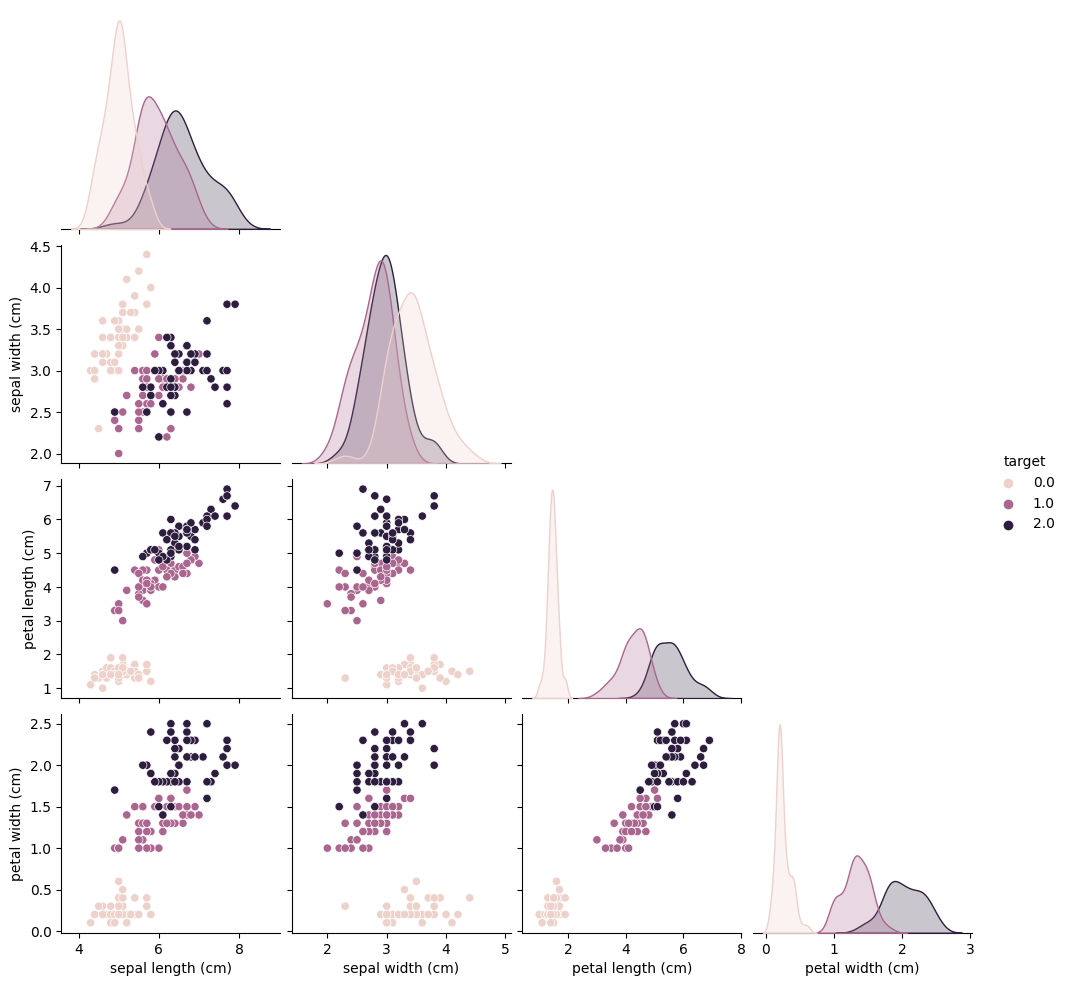

In [2]:
sns.pairplot(pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']), hue='target', corner=True)

## Clustering K-Means

Elbow

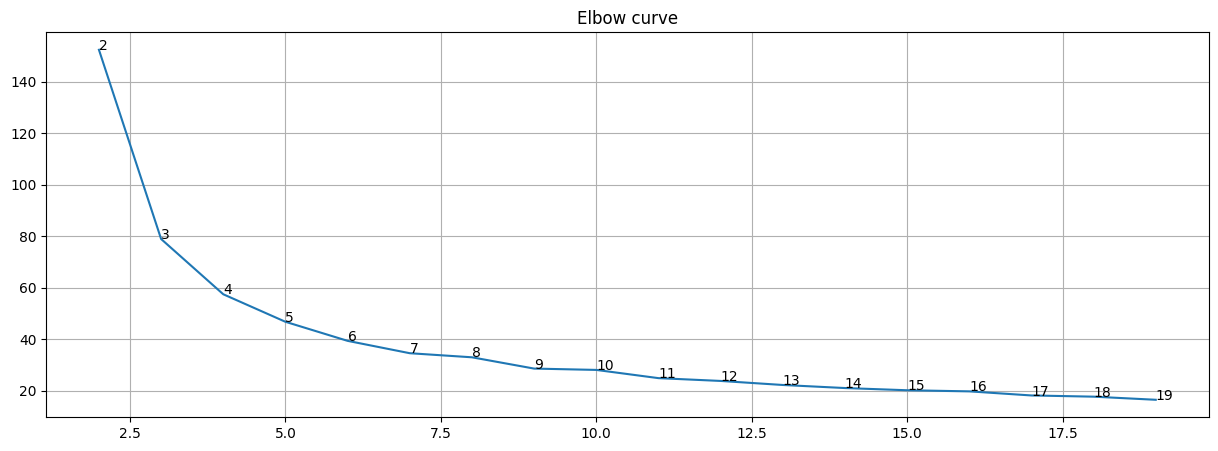

In [3]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

for i in range(2, 20):
    plt.text(i, distorsions[i - 2], str(i))


Clustering

In [4]:
km = KMeans(n_clusters=2, n_init='auto', random_state=0)
km.fit(X)
y_pred = km.predict(X)

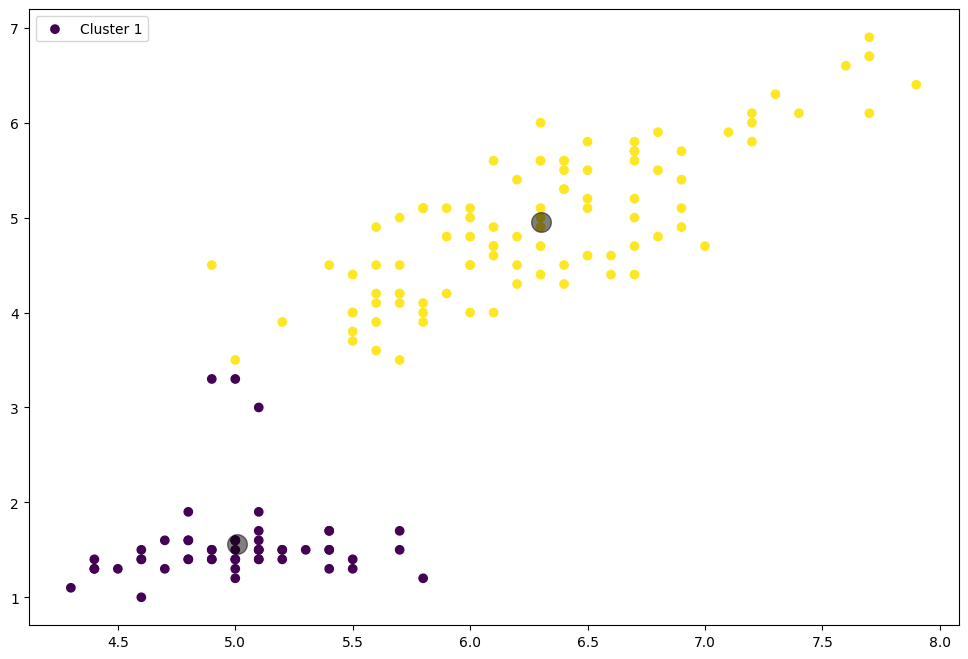

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 2], c=y_pred, cmap='viridis')
plt.legend(labels=['Cluster 1', 'Cluster 2'], loc='best')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);

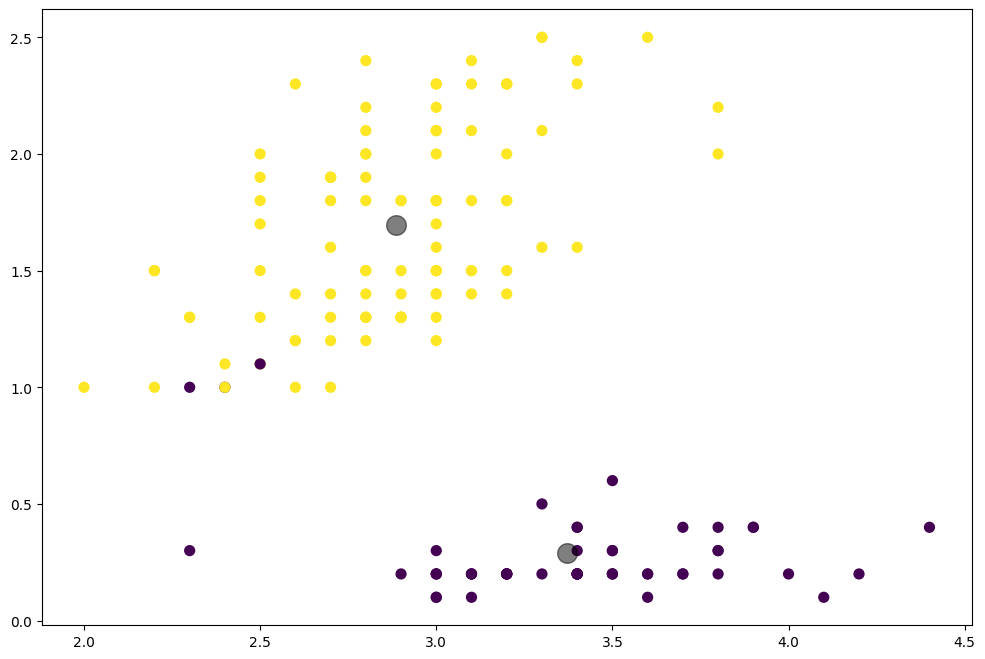

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 1], X[:, 3], c=y_pred, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 3], c='black', s=200, alpha=0.5);

Ci sono 2 cluster, quindi i targets 1 e 2 sono classificati come lo stesso (1).

<AxesSubplot: >

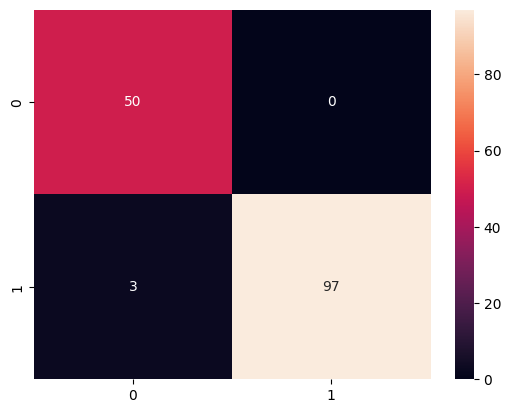

In [7]:
y_true = y.copy()
y_true[y_true == 2] = 1

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')

Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.551191604619592
For n_clusters = 4 The average silhouette_score is : 0.4974551890173751
For n_clusters = 5 The average silhouette_score is : 0.4428351063561276
For n_clusters = 6 The average silhouette_score is : 0.4564853511275811


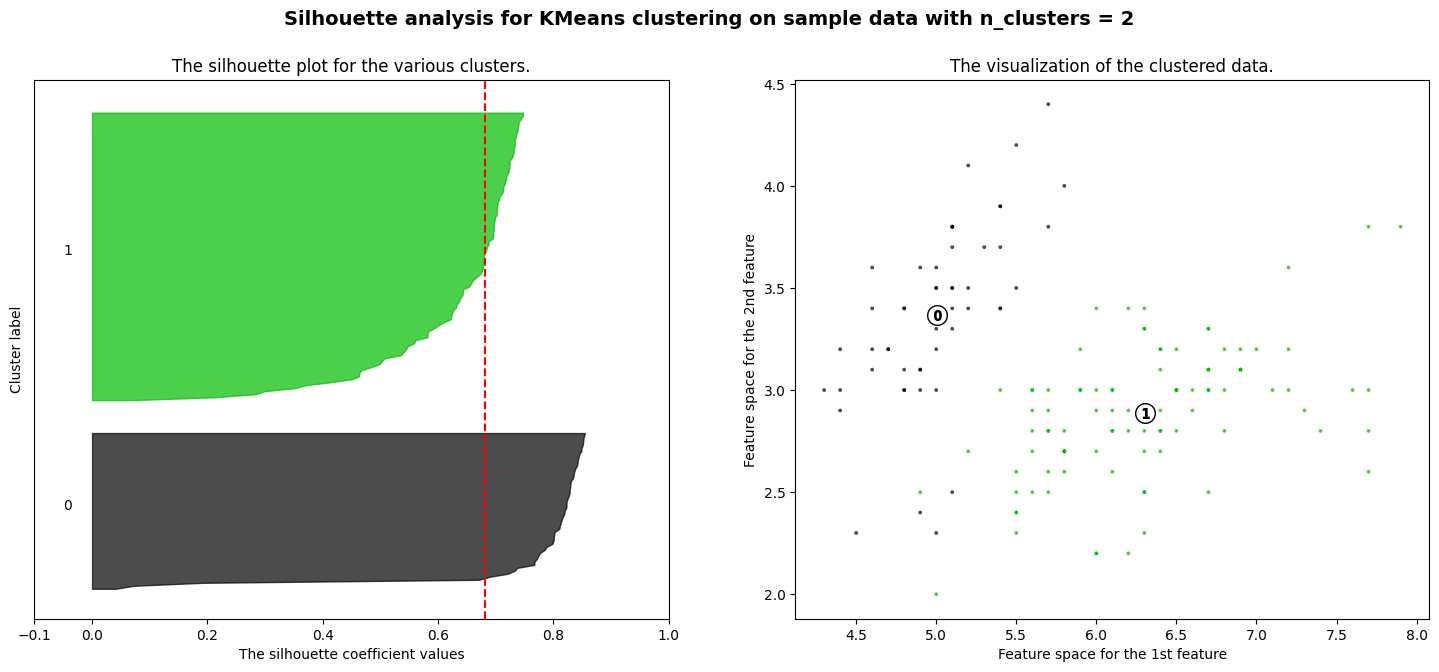

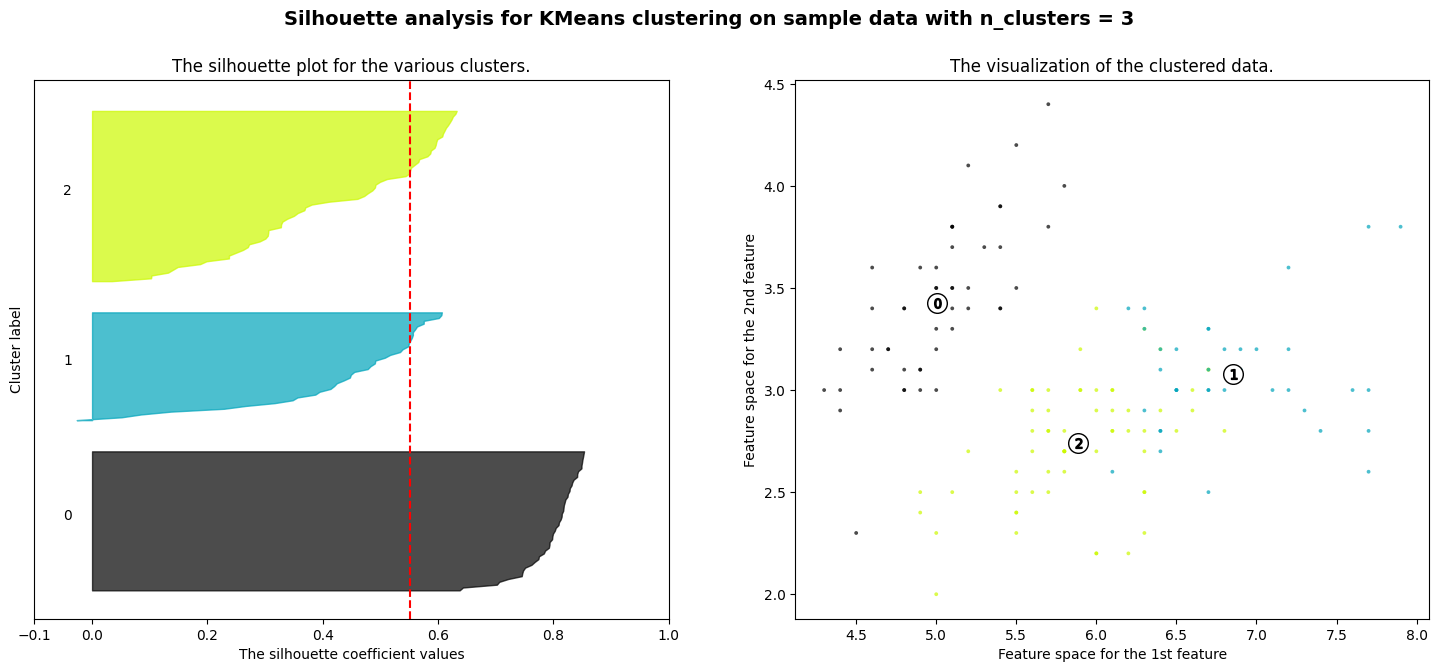

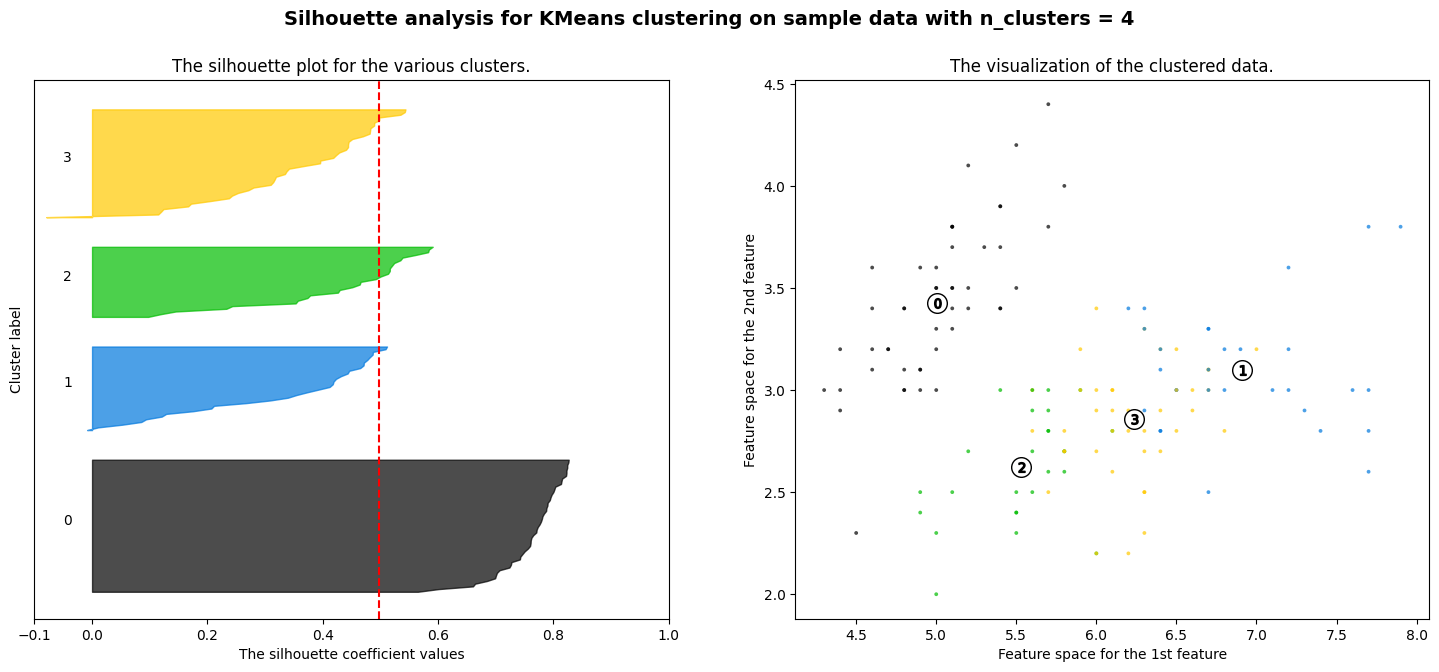

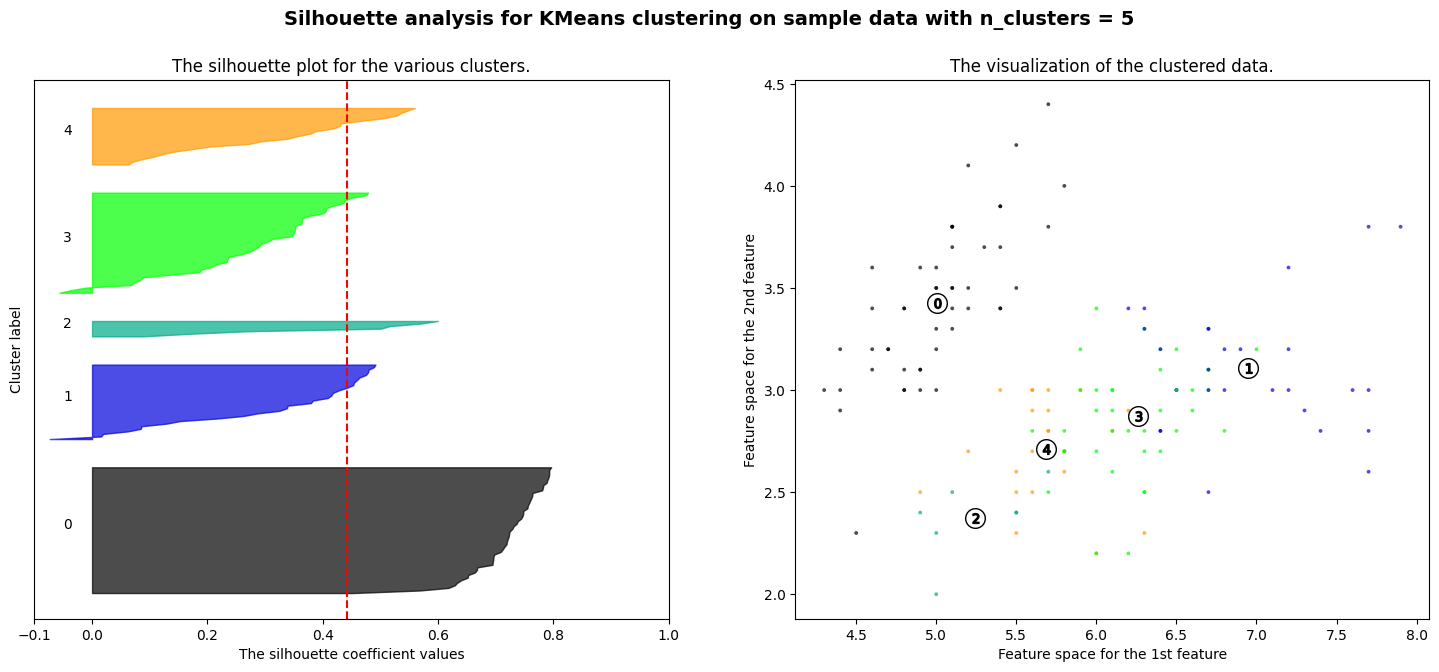

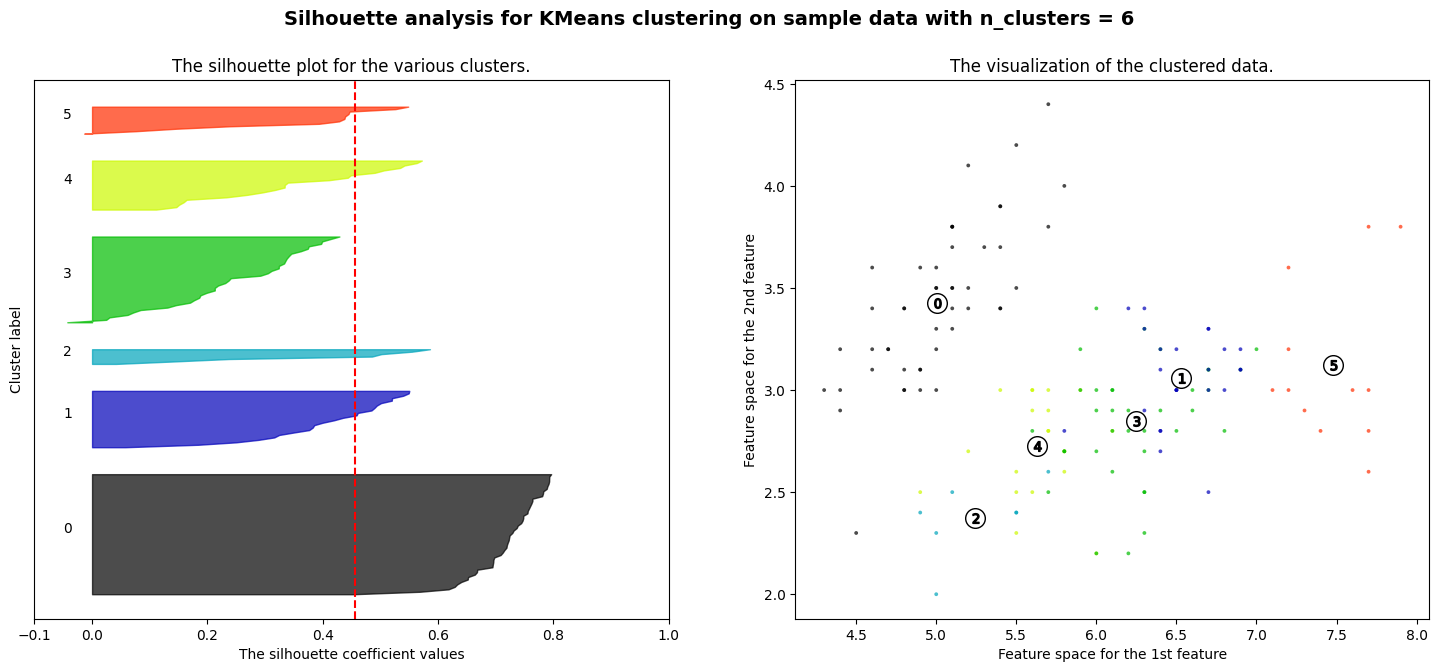

In [10]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()